In [1]:
from utility_dfcutter import *
from utility_dfplotter import ASingleKinematicPlot
%matplotlib inline

In [7]:
class DFPlotter:
    def __init__(self,selection,nbjet, njet=None):
        self.selection = selection
        self.nbjet = nbjet
        self.njet  = njet
        self._setConfiguration() 
        
    def getDataFrameList(self, variation=''):
        Data = DFCutter(self.selection, self.nbjet, 'data', self.njet).getDataFrame(variation)
        MCzz = DFCutter(self.selection, self.nbjet, 'mcdiboson',self.njet).getDataFrame(variation)
        MCz  = DFCutter(self.selection, self.nbjet, 'mcz',      self.njet).getDataFrame(variation)
        MCw  = DFCutter(self.selection, self.nbjet, 'mcw',      self.njet).getDataFrame(variation)
        MCt  = DFCutter(self.selection, self.nbjet, 'mct',      self.njet).getDataFrame(variation)
        MCtt = DFCutter(self.selection, self.nbjet, 'mctt',     self.njet).getDataFrame(variation)
        dfList = [MCzz,MCz,MCw,MCt,MCtt,Data]
        return dfList
    
    def _setConfiguration(self):
            self.labelList = ['Diboson','Z+Jets','W+Jets','t','tt','data']
            self.colorList = ['#a32020','#e0301e','#eb8c00','springgreen','deepskyblue','k']
            self.adjust = [1,1,1,1,1,1,1,1,1]

/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau_fakes/
/home/zchen/Documents/Analysis/wbranch/data/pickles_2016/mutau_fakes/
1.959179329880664


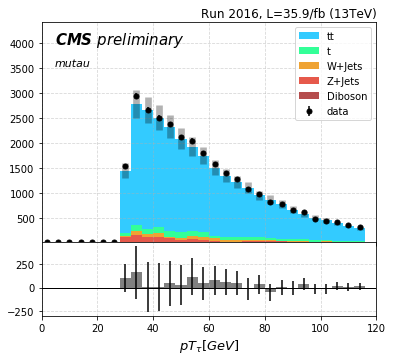

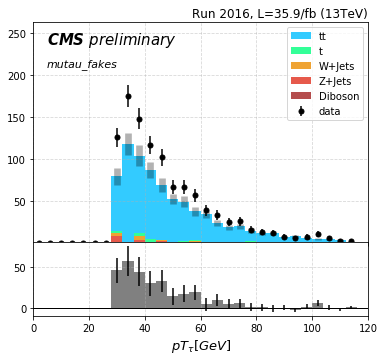

In [14]:
slt,nbjets = "mutau",">=1"
v,a,b,step,xl = "lepton2_pt", 0,120,4,r"$pT_\tau [GeV]$"

plotter = DFPlotter(slt,nbjets)
sk = ASingleKinematicPlot(v,a,b,step, plotter.getDataFrameList())
sk.settingPlot(xl,plotter.labelList,plotter.colorList,withXsErr=True)
sk.makePlot(showDiffInLower=True)
sk.axes[0].text(0.04*b+0.96*a, 1.2*sk.hdata.max(), slt ,style='italic',fontsize='11')

nmc = sum([w.sum() for w in sk.weight_list])
ndt = sk.Dataw.sum()
nfakeos = ndt-nmc

slt += "_fakes"
plotter = DFPlotter(slt,nbjets)
sk = ASingleKinematicPlot(v,a,b,step, plotter.getDataFrameList())
sk.settingPlot(xl,plotter.labelList,plotter.colorList,withXsErr=True)
sk.makePlot(showDiffInLower=True)
sk.axes[0].text(0.04*b+0.96*a, 1.2*sk.hdata.max(), slt ,style='italic',fontsize='11')

nmc = sum([w.sum() for w in sk.weight_list])
ndt = sk.Dataw.sum()
nfakess = ndt-nmc

print(nfakeos/nfakess)

In [6]:
slt0,nbjets = "mutau",">=1"
v,a,b,step,xl = "lepton1_reliso", 0,0.6,0.03,r"iso_l"

for subslt in ["","_ss","_fakes","_fakes_ss"]:
    slt = slt0+subslt
    plotter = DFPlotter(slt,nbjets)
    sk = ASingleKinematicPlot(v,a,b,step, plotter.getDataFrameList())
    sk.settingPlot(xl,plotter.labelList,plotter.colorList)
    sk.makePlot()

    nmc = sum([w.sum() for w in sk.weight_list])
    ndt = sk.Dataw.sum()
    nqcd = ndt-nmc
    subtitle = "{} channel, nQCD = {:.1f}".format(slt,nqcd)
    sk.axes[0].text(0.04*b+0.96*a, 1.2*sk.hdata.max(),  subtitle ,style='italic',fontsize='11')
    plt.savefig("../../plots/abcd/{}_{}.png".format(slt,v),dpi=200)
    plt.close()

In [5]:
nmc = sum([w.sum() for w in sk.weight_list])

In [14]:
varr = np.concatenate(sk.variable_list)
warr = np.concatenate(sk.weight_list)


In [24]:
n0 = warr.sum()
n1 = 0
n1 += warr[np.logical_and(varr>20, varr<25)].sum()*1.061694561
n1 += warr[np.logical_and(varr>25, varr<30)].sum()*1.177661174
n1 += warr[np.logical_and(varr>30, varr<40)].sum()*1.488901406
n1 += warr[np.logical_and(varr>40, varr<50)].sum()*0.972327128
n1 += warr[np.logical_and(varr>50, varr<65)].sum()*0.897842372
n1 += warr[np.logical_and(varr>65, varr<80)].sum()*0.857519502

n1/n0

1.0763189987685966

In [ ]:
n0 = warr.sum()
n1 = 0
n1 += warr[np.logical_and(varr>20, varr<25)].sum()*1.061694561
n1 += warr[np.logical_and(varr>25, varr<30)].sum()*1.177661174
n1 += warr[np.logical_and(varr>30, varr<40)].sum()*1.488901406
n1 += warr[np.logical_and(varr>40, varr<50)].sum()*0.972327128
n1 += warr[np.logical_and(varr>50, varr<65)].sum()*0.897842372
n1 += warr[np.logical_and(varr>65, varr<80)].sum()*0.857519502

n1/n0